In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statistics as stats

In [39]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
data = pd.read_csv('D:/Machine_Learning/ML/Datasets/accelerator/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
data.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [40]:
data.to_csv("data.csv")

In [41]:
data.isna().sum()

user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       1
dtype: int64

In [42]:
data = data.dropna(axis=0);

In [43]:
data.isna().sum()

user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       0
dtype: int64

In [44]:
data.shape

(1098203, 6)

In [45]:
data.dtypes

user           int64
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object

In [46]:
data.sort_values(by=['user','timestamp']);

In [61]:
random_seed = 42   
n_time_steps = 70 
n_features = 3 
step = 10 
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015

In [63]:
segments = []
labels = []
df = data
for i in range(0,  df.shape[0]- n_time_steps, step):  

    xs = df['x-axis'].values[i: i + n_time_steps]

    ys = df['y-axis'].values[i: i + n_time_steps]

    zs = df['z-axis'].values[i: i + n_time_steps]
    
    label = stats.mode(df['activity'][i: i + 71])[0][0]

    segments.append([xs, ys, zs])

    labels.append(label)

print("Done")
#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)


Done


In [64]:
reshaped_segments.shape

(109814, 70, 3)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

In [66]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

In [74]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128)               67584     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 325       
Total params: 76,165
Trainable params: 76,165
Non-trainable params: 0
_________________________________________________________________


In [76]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)

Epoch 1/50
69/69 [==============================] - 70s 979ms/step - loss: 1.1675 - accuracy: 0.5072 - val_loss: 0.5243 - val_accuracy: 0.8122
Epoch 2/50
69/69 [==============================] - 64s 927ms/step - loss: 0.5087 - accuracy: 0.8176 - val_loss: 0.4315 - val_accuracy: 0.8432
Epoch 3/50
69/69 [==============================] - 68s 988ms/step - loss: 0.4439 - accuracy: 0.8393 - val_loss: 0.4003 - val_accuracy: 0.8513
Epoch 4/50
69/69 [==============================] - 70s 1s/step - loss: 0.4037 - accuracy: 0.8505 - val_loss: 0.3407 - val_accuracy: 0.8718
Epoch 5/50
69/69 [==============================] - 65s 936ms/step - loss: 0.3651 - accuracy: 0.8636 - val_loss: 0.3231 - val_accuracy: 0.8795
Epoch 6/50
69/69 [==============================] - 57s 829ms/step - loss: 0.3335 - accuracy: 0.8751 - val_loss: 0.2972 - val_accuracy: 0.8892
Epoch 7/50
69/69 [==============================] - 62s 904ms/step - loss: 0.3016 - accuracy: 0.8859 - val_loss: 0.2686 - val_accuracy: 0.8995
Ep

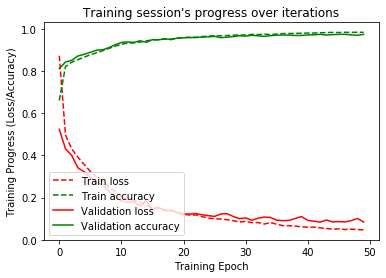

In [77]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [78]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

22/22 [==============================] - 6s 283ms/step - loss: 0.0882 - accuracy: 0.9730
Test Accuracy : 0.9730000495910645
Test Loss : 0.08821295201778412


In [80]:
import pickle
file = 'model.sav'
pickle.dump(model,file)

TypeError: file must have a 'write' attribute

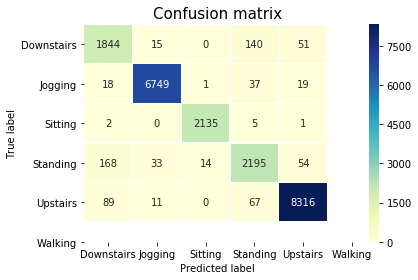

In [60]:
from sklearn import metrics
predictions = model.predict(X_test)
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()